## Lab 5 - Ujwal Joshi

In [12]:
import pandas as pd
import numpy as np

In this lab, we will use the red wine quality dataset which is attached with the instructions, you can find the description at https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data. 

#### Question 1

Make a data frame with first 11 columns from the original dataset You will apply the different clusters you learned in class to this dataset. Then,processing the dataset, you may deal with the null value, high related factors. (10)

In [10]:
wine_df = pd.read_csv('winequality-red.csv', usecols=range(11))
print(wine_df.shape)
wine_df.head()

(1599, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


There are no null values in the dataset.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

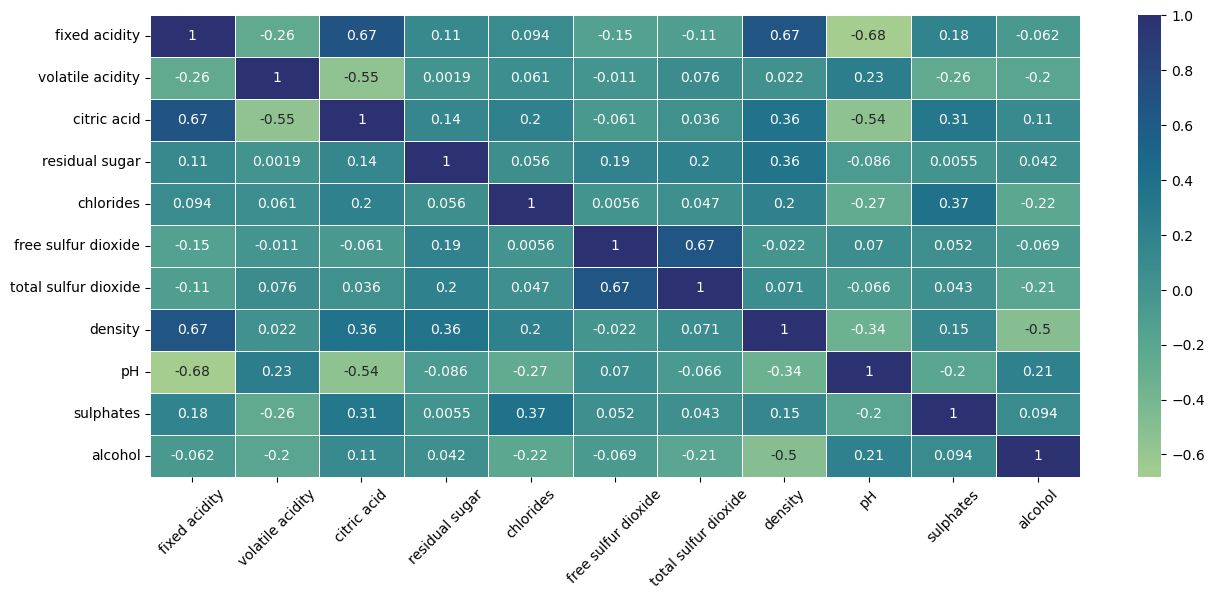

In [18]:
plt.figure(figsize=(15, 6))
sns.heatmap(wine_df.corr(), annot=True, linewidth=.5, cmap='crest')
plt.xticks(rotation=45) 
plt.show()

I am considering correlation coefficients whose magnitude are between 0.7 and 0.9 to be highly correlated, while some of these features get close none get above 0.7 I will leave the features as they are.

 #### Question 2 

Apply K-Means Cluster to the dataset, Apply K-Means Cluster to the dataset, print the Silhouette score (10).

Using elbow method to find optimal number of clusters

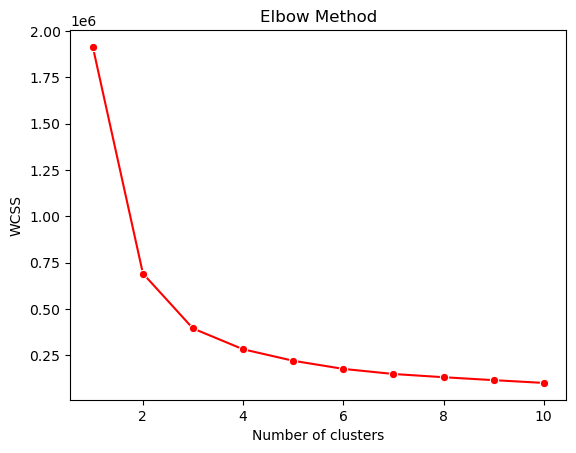

In [19]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(wine_df)
    wcss.append(kmeans.inertia_)

# creating lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

warnings.resetwarnings()

Applying K means to our dataset with 2 clusters

In [77]:
warnings.filterwarnings("ignore")

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_fit = kmeans.fit_predict(wine_df)

warnings.resetwarnings()

In [78]:
kmeans.cluster_centers_

array([[8.42425785e+00, 5.19334182e-01, 2.66539440e-01, 2.39427481e+00,
        8.54461408e-02, 1.23719254e+01, 3.03443596e+01, 9.96676836e-01,
        3.31552163e+00, 6.56530958e-01, 1.05402177e+01],
       [8.02595238e+00, 5.51642857e-01, 2.83428571e-01, 2.94452381e+00,
        9.31380952e-02, 2.57083333e+01, 9.17285714e+01, 9.96942738e-01,
        3.29873810e+00, 6.62690476e-01, 1.00938889e+01]])

In [79]:
wine_kmeans_df = wine_df.copy()
wine_kmeans_df['Cluster'] = kmeans.labels_

wine_kmeans_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Printing the silhouette score

In [102]:
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

silhouette_score_kmeans = silhouette_score(wine_df, KMeans(n_clusters = 2, init = 'k-means++', random_state = 42).fit_predict(wine_df))
print(silhouette_score_kmeans)

warnings.resetwarnings()

0.6034220347331241


#### Question 3

Apply Hierarchical to the dataset, Apply K-Means Cluster to the dataset, print the Silhouette score.(10)

Constructing a dendrogram

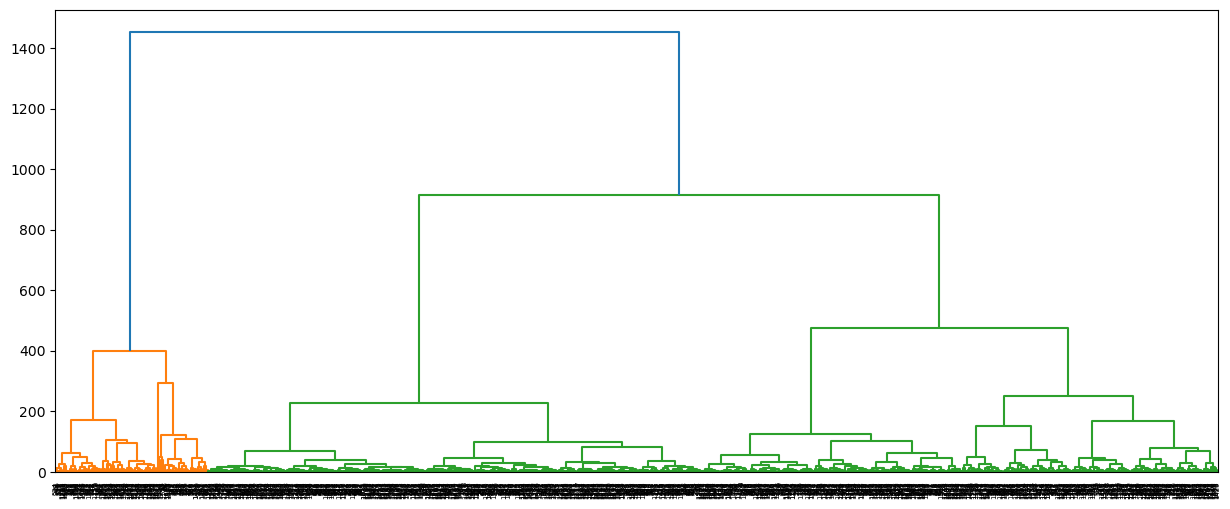

In [76]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 6))
Dendrogram = shc.dendrogram((shc.linkage(wine_df, method ='ward'))) 
plt.show()

Applying Hierarchical Clustering

In [87]:
from sklearn.cluster import AgglomerativeClustering 

agg = AgglomerativeClustering()
agg.fit_predict(wine_df)
print("Number of clusters:", agg.n_clusters_)

Number of clusters: 2


In [96]:
wine_hCluster_df = wine_df.copy()
wine_hCluster_df['Cluster'] = agg.labels_

wine_hCluster_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Printing the silhouette score

In [101]:
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

silhouette_score_hCluster = silhouette_score(wine_df, AgglomerativeClustering().fit_predict(wine_df))
print(silhouette_score_hCluster)

warnings.resetwarnings()

0.6075194993486872


#### Question 4

Apply DBScan to the dataset, print the Silhouette score and best cluster number.(10)

In [170]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=3, min_samples=5, metric='euclidean')
db.fit_predict(wine_df)

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [165]:
warnings.filterwarnings("ignore")

silhouette_score_DBSCAN = silhouette_score(wine_df, DBSCAN(eps=3, min_samples=5, metric='euclidean').fit_predict(wine_df))
print(silhouette_score_DBSCAN)

warnings.resetwarnings()

0.10315155458963413


In [169]:
wine_DBSCAN_df = wine_df.copy()
wine_DBSCAN_df['Cluster'] = db.labels_

wine_DBSCAN_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,-1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


#### Question 5

Now make cluster number = 10, redo the cluste process and print the Silhouette scores. (10)

In [168]:
db2 = DBSCAN(eps=3, min_samples=10, metric='euclidean')
db2.fit_predict(wine_df)

warnings.filterwarnings("ignore")

silhouette_score_DBSCAN = silhouette_score(wine_df, DBSCAN(eps=3, min_samples=10, metric='euclidean').fit_predict(wine_df))
print(silhouette_score_DBSCAN)

warnings.resetwarnings()

-0.0012525588533599179


#### Question 6

Match the cluster results with the 12th column, "quality", to add a column named as "prediction". For example, find all the data with quality = 6, and count the number of cluster numbers if in total there are 120 data with quality = 6 and 100 of their cluster numbers are 2, then all the data with cluster number = 2 should be marked as 6 in the "prediction" column. (10)

In [189]:
quality = pd.read_csv('winequality-red.csv', usecols=[11])
wine_quality_df = wine_df.copy()
wine_quality_df['quality'] = quality.values

wine_quality_df['kmeans_prediction'] = wine_kmeans_df['Cluster'].values
wine_quality_df['hcluster_prediction'] = wine_hCluster_df['Cluster'].values
wine_quality_df['DBSCAN_prediction'] = wine_DBSCAN_df['Cluster'].values

#### Question 7

Now get the accracy score with the "Prediction" column and "quality" column.(10)

In [ ]:
# Write your code here

#### Question 8

Now seperate the data with 80% training set and 20% testing set and train a ANN model with the training set and print the accuracy score of the testing set.(10)

In [ ]:
# Write your code here

#### Question 9

Compare the accuracy scores of the previous four models, which one is the best?(10)

Write your code here

#### Question 10

Do you think we can use the unsupervised cluster models tobe a classifier in this way? Why?(10)

Write your code here